In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [4]:
y.loc[y['num']!=0,'num']=1

C:\Users\Samaneh\AppData\Local\Temp\ipykernel_3496\135129469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['num']!=0,'num']=1


In [5]:
new_X=X[X.isna().any(axis=1)==False]

In [6]:
new_y=y[X.isna().any(axis=1)==False]

In [7]:
new_y=new_y.values.ravel()

In [8]:
new_X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [11]:
import pandas as pd
new_X_encoded=pd.get_dummies(new_X,columns=['sex','cp','fbs','restecg','exang','slope','thal'],drop_first=True)
new_X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   trestbps   297 non-null    int64  
 2   chol       297 non-null    int64  
 3   thalach    297 non-null    int64  
 4   oldpeak    297 non-null    float64
 5   ca         297 non-null    float64
 6   sex_1      297 non-null    uint8  
 7   cp_2       297 non-null    uint8  
 8   cp_3       297 non-null    uint8  
 9   cp_4       297 non-null    uint8  
 10  fbs_1      297 non-null    uint8  
 11  restecg_1  297 non-null    uint8  
 12  restecg_2  297 non-null    uint8  
 13  exang_1    297 non-null    uint8  
 14  slope_2    297 non-null    uint8  
 15  slope_3    297 non-null    uint8  
 16  thal_6.0   297 non-null    uint8  
 17  thal_7.0   297 non-null    uint8  
dtypes: float64(2), int64(4), uint8(12)
memory usage: 19.7 KB


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_X_encoded)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,new_y)

Logistic Regression

In [14]:
model=LogisticRegression()

In [15]:
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred=model.predict(X_test)

In [17]:
print(accuracy_score(y_test,y_pred))

0.88


In [18]:
confusion_matrix(y_test,y_pred)

array([[32,  6],
       [ 3, 34]], dtype=int64)

In [19]:
from pprint import pprint
pprint(classification_report(y_test,y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.91      0.84      0.88        38\n'
 '           1       0.85      0.92      0.88        37\n'
 '\n'
 '    accuracy                           0.88        75\n'
 '   macro avg       0.88      0.88      0.88        75\n'
 'weighted avg       0.88      0.88      0.88        75\n')


Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
cf=DecisionTreeClassifier(random_state=42)

In [22]:
cf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
cf_y_pred=cf.predict(X_test)

In [24]:
from pprint import pprint
pprint(classification_report(y_test,cf_y_pred))
print(accuracy_score(y_test,cf_y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.78      0.82      0.79        38\n'
 '           1       0.80      0.76      0.78        37\n'
 '\n'
 '    accuracy                           0.79        75\n'
 '   macro avg       0.79      0.79      0.79        75\n'
 'weighted avg       0.79      0.79      0.79        75\n')
0.7866666666666666


In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

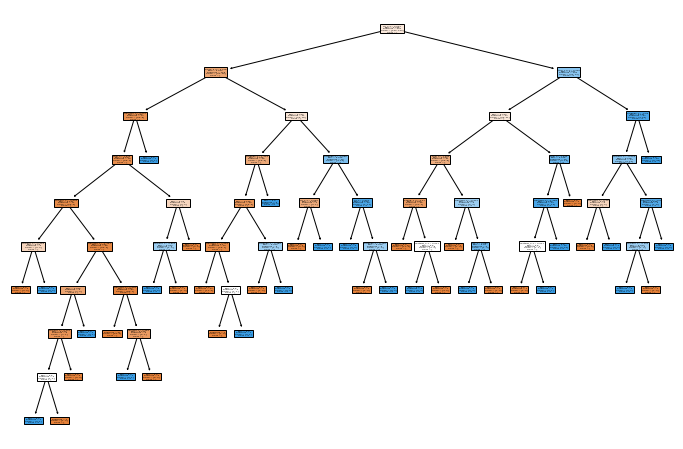

In [26]:
plt.figure(figsize=(12,8))
tree.plot_tree(cf, filled=True, feature_names=new_X_encoded.columns, class_names=str(cf.classes_))
plt.show()


RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_cf=RandomForestClassifier(random_state=42)

In [29]:
rf_cf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
rf_cf_y_pred=rf_cf.predict(X_test)

In [31]:
from pprint import pprint
pprint(classification_report(y_test,rf_cf_y_pred))
print(accuracy_score(y_test,rf_cf_y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.84      0.84      0.84        38\n'
 '           1       0.84      0.84      0.84        37\n'
 '\n'
 '    accuracy                           0.84        75\n'
 '   macro avg       0.84      0.84      0.84        75\n'
 'weighted avg       0.84      0.84      0.84        75\n')
0.84


In [32]:
conf_matrix = confusion_matrix(y_test, rf_cf_y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[32  6]
 [ 6 31]]


XGBOOST

In [33]:
from xgboost import XGBClassifier

In [34]:
xg=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [35]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [36]:
xg_y_pred=xg.predict(X_test)

In [37]:
from pprint import pprint
pprint(classification_report(y_test,xg_y_pred))
print(accuracy_score(y_test,xg_y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.82      0.82      0.82        38\n'
 '           1       0.81      0.81      0.81        37\n'
 '\n'
 '    accuracy                           0.81        75\n'
 '   macro avg       0.81      0.81      0.81        75\n'
 'weighted avg       0.81      0.81      0.81        75\n')
0.8133333333333334


SVM Classifier

In [38]:
from sklearn.svm import SVC

In [39]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [40]:
svm_y_pred=svm_classifier.predict(X_test)

In [41]:
from pprint import pprint
pprint(classification_report(y_test,svm_y_pred))
print(accuracy_score(y_test,svm_y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.84      0.84      0.84        38\n'
 '           1       0.84      0.84      0.84        37\n'
 '\n'
 '    accuracy                           0.84        75\n'
 '   macro avg       0.84      0.84      0.84        75\n'
 'weighted avg       0.84      0.84      0.84        75\n')
0.84


In [42]:
import joblib
joblib.dump(svm_classifier, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [43]:
pip install Flask

     ------------------------------------ 101.7/101.7 kB 486.7 kB/s eta 0:00:00
     ------------------------------------ 227.6/227.6 kB 696.5 kB/s eta 0:00:00
     ------------------------------------ 133.3/133.3 kB 207.5 kB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.2.2
    Uninstalling Werkzeug-2.2.2:
      Successfully uninstalled Werkzeug-2.2.2
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.0.3
    Uninstalling Jinja2-3.0.3:
      Successfully uninstalled Jinja2-3.0.3
  Attempting uninstall: click
    Found existing installation: click 8.0.3
    Uninstalling click-8.0.3:
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


      Successfully uninstalled click-8.0.3


In [49]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('heart_disease_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)
   


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [48]:
%tb

SystemExit: 1